# Exercise 2

Modern camera with complete square pixels $\rarr$ Skew parameters $\alpha=1, \beta=0$


In [77]:
# Ex1.11
import numpy as np
import matplotlib.pyplot as plt

def Pi(ph):
    '''
    Converts coordinates from homogeneous to inhomogeneous.
    ph : 4xn np.array
    p : 3xn np.array
    '''
    p = ph[:-1]/ph[-1]   # divide by and remove last coordinate
    return p

def PiInv(p):
    '''
    Converts coordinates from inhomogeneous to homogeneous.
    p : 3xn np.array
    ph : 4xn np.array
    '''
    ph = np.vstack((p,np.ones(p.shape[1])))
    return ph

import itertools as it
def box3d(n=16):
    '''Generate 3D points inside a cube with n-points along each edge'''
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

# Ex1.13
def projectpoints(K,R,t,Q):
    '''
    Project 3D points in Q onto a 2D plane of a camera

    K : 3 x 3, intrinsic camera matrix
    R : 3 x 3, rotation matrix
    t: 3 x 1, translation matrix
    Q: 3 x n, 3D points matrix

    P : 2 x n, 2D points matrix
    '''
    Qh = PiInv(Q)           # 4 x n
    pose = np.hstack((R,t)) # 3 x 4
    Ph = K @ pose @ Qh      # 3 x n
    P = Pi(Ph)              # 2 x n
    return P    

def camera_intrinsic(f, c, alpha=1, beta=0):
    '''
    Create a camera intrinsic matrix

    f : float, focal length
    c : 2D principal point
    alpha : float, skew
    beta : float, aspect ratio
    '''
    K = np.array([[f, beta*f, c[0]],
                  [0, alpha*f, c[1]],
                  [0, 0, 1]])
    return K

In [78]:
f = 600
a = 1
b = 0
deltax = 400
deltay = 400
# resolution = 800x800, assuming principal point is the middle of the image

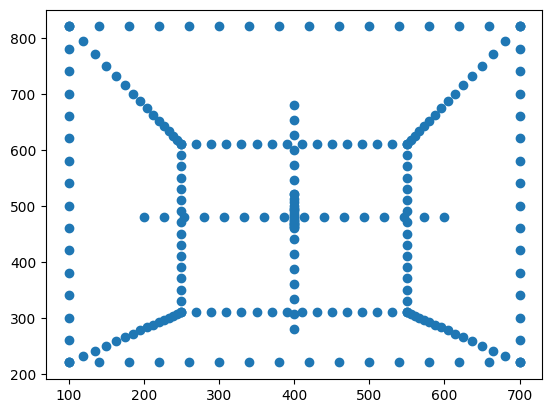

In [79]:

K = camera_intrinsic(f, (deltax,deltay), a, b)
R = np.eye(3)
t = np.array([0,0.2,1.5]).reshape(-1,1)
Q = box3d()  # 3x240 matrix

P = projectpoints(K,R,t,Q)
plt.scatter(P[0,:],P[1,:])
plt.show()
# No, not all points are captured by the image sensor. The top part of 
# the box is cut off as the coordinates are beyond 800.

In [80]:
P1 = np.array([-0.5,-0.5,-0.5]).reshape(-1,1)

projectpoints(K,R,t,P1)
# P1 is projected to (100,220)

array([[100.],
       [220.]])

In [89]:
# Ex 2.2

def distort(q,distCoeffs):
    '''
    Apply distortion to a 2D point on the image plane
    '''
    r = np.sqrt((q[0])**2 + (q[1])**2)
    correction = 1
    for i in range(len(distCoeffs)):
        exp = 2*(i+1)
        correction += distCoeffs[i]*r**exp
    qd = q*correction
    return qd

def projectpoints(K,R,t,Q,distCoeffs):
    '''
    Project 3D points in Q onto a 2D plane of a camera with distortion.

    K : 3 x 3, intrinsic camera matrix
    R : 3 x 3, rotation matrix
    t: 3 x 1, translation matrix
    Q: 3 x n, 3D points matrix
    distCoeffs: [k3,k5,k7,...] distortion coefficients

    P : 2 x n, 2D points matrix
    '''    
    Qh = PiInv(Q)            # 4 x n
    Rt = np.hstack((R ,t)) # 3 x 4
    qh = Rt @ Qh           # 3 x n
    q = Pi(qh)               # 2 x n
    qd = distort(q,distCoeffs)  # 2 x n
    Ph = K @ PiInv(qd)          # 3 x n
    P = Pi(Ph)              # 2 x n
    return P    

In [92]:
# Breakdown of applying distortion to a single 3D point

# Project 3D point into a 2D point on the image plane
P1 = np.array([-0.5,-0.5,-0.5]).reshape(-1,1)
pose = np.hstack((R,t))  # 3 x 4
qh = pose @ PiInv(P1)    # 3 x 1
q = Pi(qh)
print(f"3D Point {P1.T} is projected onto {q.T} before distortion.")

# Apply distortion to the 2D point on image plane
distCoeffs = [-0.2,0,0]
qd = distort(q, distCoeffs)
print(f"2D point {q.T} is distorted to {qd.T} on image plane.")

# Project distorted 2D point into pixel coordinates
qh = PiInv(qd)
pd = K @ qh
print(f"Distorted point {qd.T} is projected to {pd.T} after distortion.")

3D Point [[-0.5 -0.5 -0.5]] is projected onto [[-0.5 -0.3]] before distortion.
2D point [[-0.5 -0.3]] is distorted to [[-0.466  -0.2796]] on image plane.
Distorted point [[-0.466  -0.2796]] is projected to [[120.4  232.24   1.  ]] after distortion.


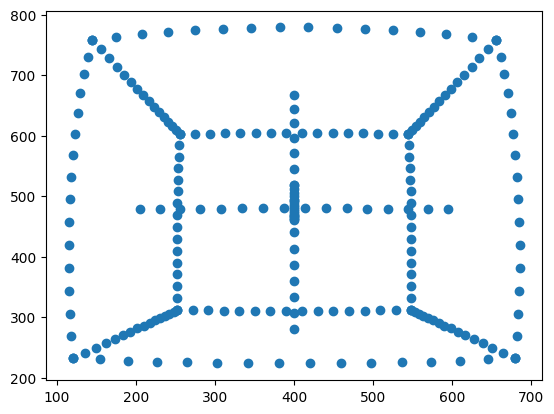

In [93]:
# Applying distortion to many 3D points

K = camera_intrinsic(f, (deltax,deltay), a, b)
R = np.eye(3)
t = np.array([0,0.2,1.5]).reshape(-1,1)
Q = box3d()  # 3x240 matrix

P = projectpoints(K,R,t,Q,distCoeffs)
plt.scatter(P[0,:],P[1,:])
plt.show()
# Yes, all points are captured by the image sensor as all points
# lie within the 800x800 resolution.

In [ ]:
# Ex 2.3
